In [13]:
import numpy as np
import  os
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                  fname='flower_photos.tgz',
                                  extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [3]:
classes = ['roses','daisy','dandelion','sunflowers','tulips']

In [4]:
for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(t, os.path.join(base_dir, 'train', cl))

    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images


Error: Destination path '/home/nikhil/.keras/datasets/flower_photos/train/roses/6125332325_b768e08bd9_n.jpg' already exists

In [5]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [6]:
batch_size = 100
IMG_SHAPE = 150

In [7]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [8]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='sparse')

Found 2935 images belonging to 5 classes.


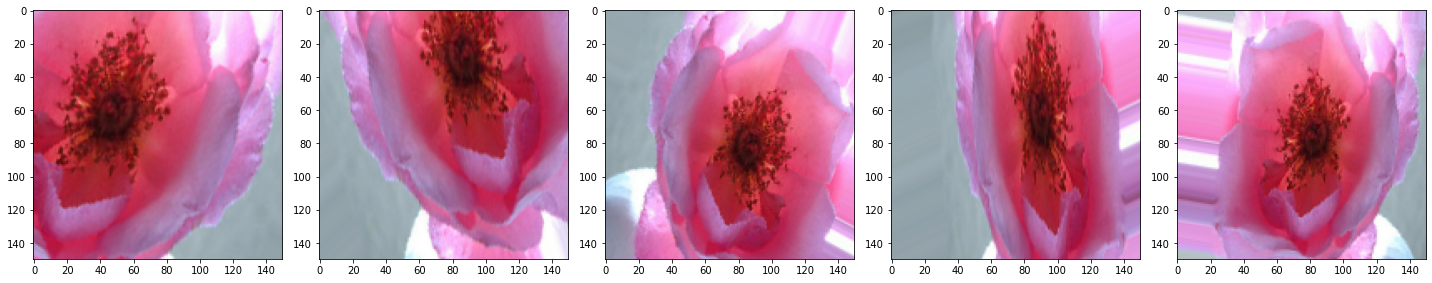

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [11]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='sparse')

Found 735 images belonging to 5 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [18]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
EPOCHS = 10
history = model.fit(train_data_gen,steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
                   epochs=EPOCHS,
                   validation_data=val_data_gen,
                   validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))))

Epoch 1/10
30/30 [==============================] - 97s 3s/step - loss: 1.4195 - accuracy: 0.3601 - val_loss: 1.1100 - val_accuracy: 0.5429
Epoch 2/10
30/30 [==============================] - 80s 3s/step - loss: 1.1430 - accuracy: 0.5247 - val_loss: 1.0658 - val_accuracy: 0.5293
Epoch 3/10
30/30 [==============================] - 80s 3s/step - loss: 1.0739 - accuracy: 0.5683 - val_loss: 0.9854 - val_accuracy: 0.6082
Epoch 4/10
30/30 [==============================] - 80s 3s/step - loss: 1.0178 - accuracy: 0.5997 - val_loss: 0.9657 - val_accuracy: 0.5959
Epoch 5/10
30/30 [==============================] - 80s 3s/step - loss: 0.9875 - accuracy: 0.6129 - val_loss: 0.8216 - val_accuracy: 0.6694
Epoch 6/10
30/30 [==============================] - 80s 3s/step - loss: 0.9447 - accuracy: 0.6194 - val_loss: 0.7874 - val_accuracy: 0.6898
Epoch 7/10
30/30 [==============================] - 80s 3s/step - loss: 0.8769 - accuracy: 0.6562 - val_loss: 0.8270 - val_accuracy: 0.6830
Epoch 8/10
30/30 [==

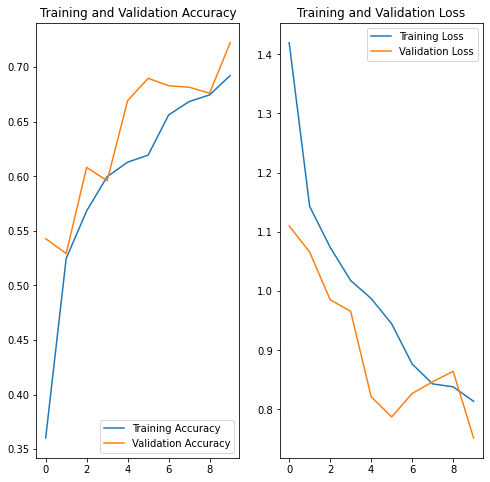

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.savefig('./foo.png')
plt.show()